In [1]:
'''
Further simplification of the phase plane plot function
as published by Dominik Krzeminski (dokato) at
https://gist.github.com/dokato/68c122f6508461cad91e245a93be9eaf

Author: E. Dronkert https://github.com/ednl
'''
import numpy as np
import matplotlib.pyplot as plt

def phase_plane_plot(model, x1_range=(-1, 1), x2_range=None, points=81):
    '''
    model     = 2x2 matrix (Numpy array) representing a system of coupled ODEs
    x1_range  = range of x1 (tuple)
    x2_range  = range of x2 (tuple), same as range1 if not provided
    points    = number of points in linspace of x1 and x2
    '''
    if x2_range is None:
        x2_range = x1_range

    x1, x2 = np.meshgrid(
        np.linspace(x1_range[0], x1_range[1], points),
        np.linspace(x2_range[0], x2_range[1], points))  # grid matrices filled with values of x1 and x2
    xdot = np.zeros((points, points, 2))  # matrix of vectors
    
    for i1 in range(points):
        for i2 in range(points):
            xdot[i1, i2] = model @ [x1[i1, i2], x2[i1, i2]]  # dot product of matrix and vector

    plt.subplots(figsize=(12, 12))
    plt.streamplot(x1, x2, xdot[:, :, 0], xdot[:, :, 1], linewidth=0.5, density=1.0)
    plt.contour(x1, x2, xdot[:, :, 0], [0], colors = 'r')
    plt.contour(x1, x2, xdot[:, :, 1], [0], colors = 'g')
    plt.axis('square')
    plt.axis([x1_range[0], x1_range[1], x2_range[0], x2_range[1]])
    plt.grid(linestyle=':')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()

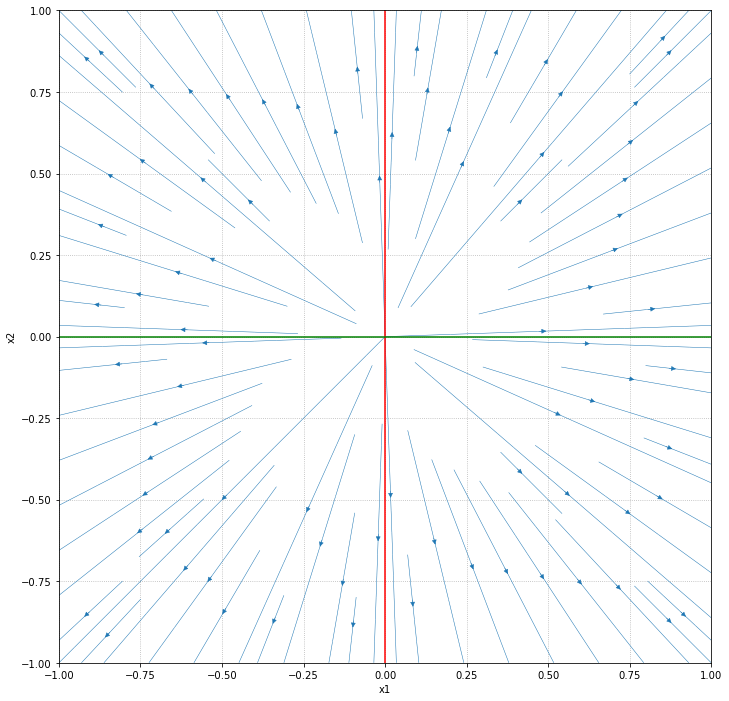

In [2]:
# Source
phase_plane_plot(np.array([[1, 0], [0, 1]]))

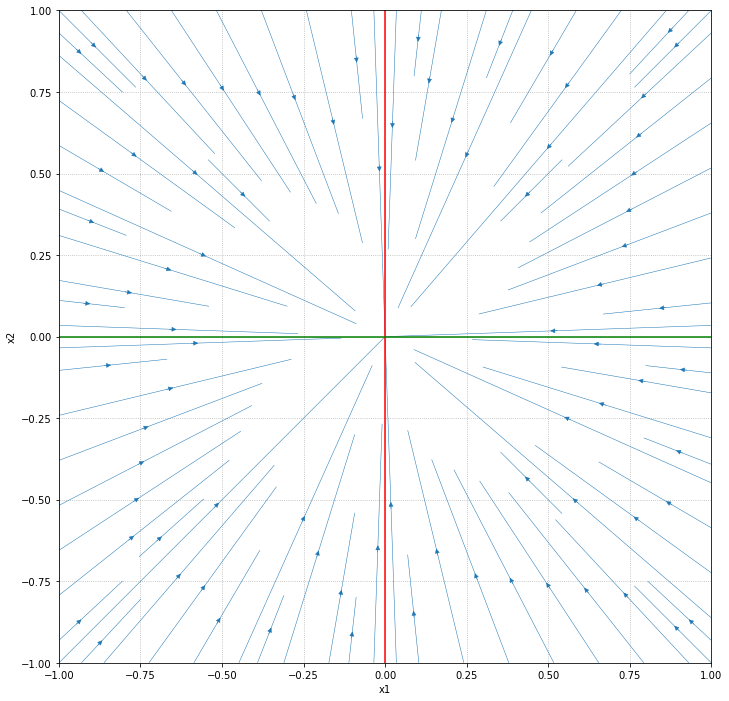

In [3]:
# Sink
phase_plane_plot(np.array([[-1, 0], [0, -1]]))

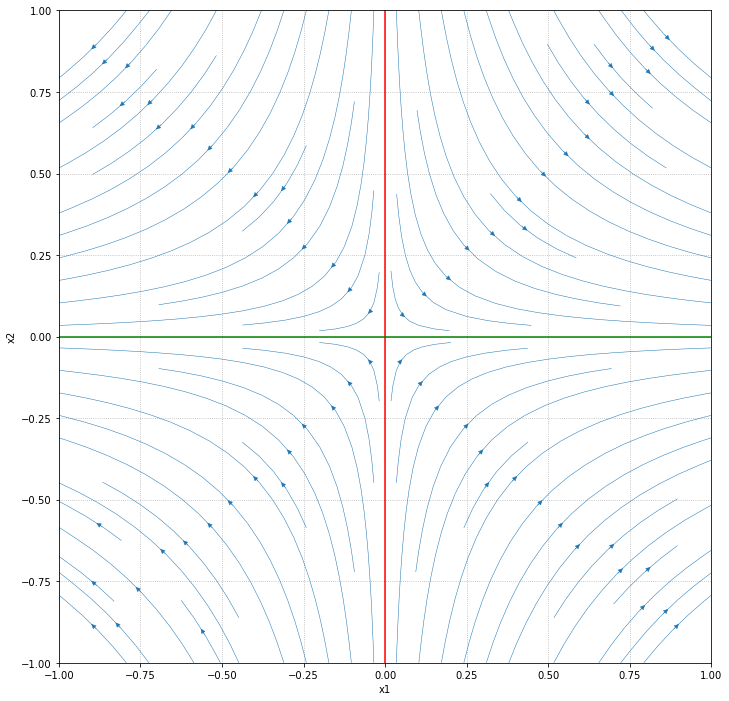

In [4]:
# Saddle point
phase_plane_plot(np.array([[1, 0], [0, -1]]))

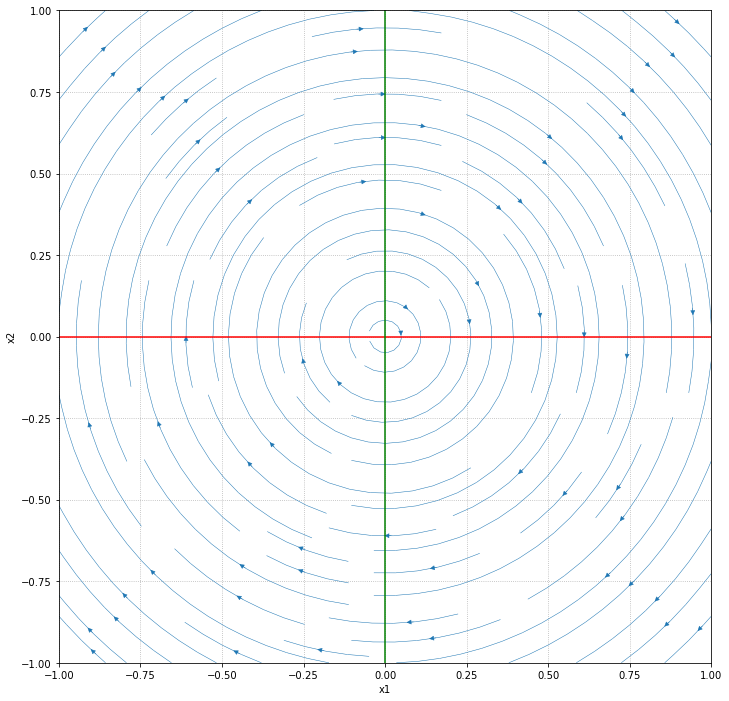

In [5]:
# Centre fixed point (neutrally stable)
phase_plane_plot(np.array([[0, 1], [-1, 0]]))

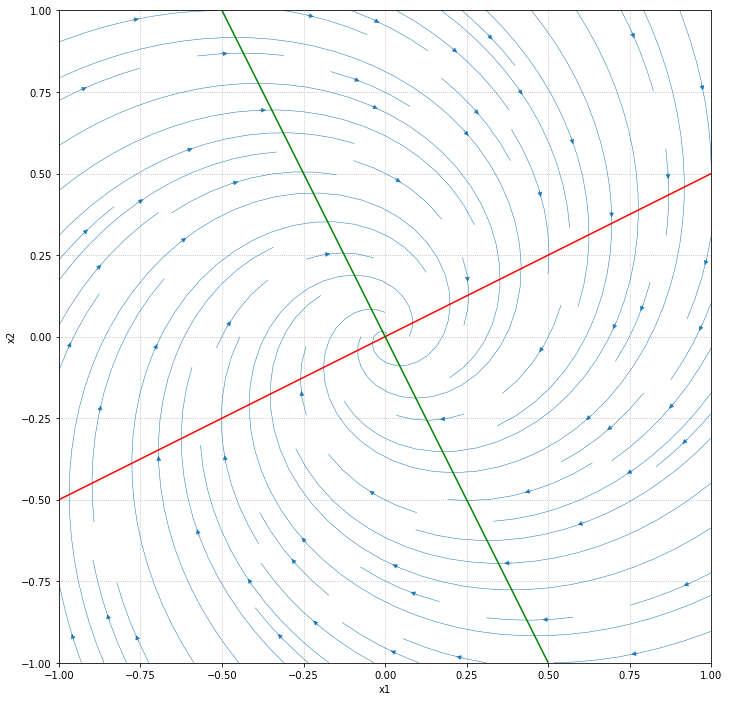

In [6]:
# Stable spiral / spiral sink / centre fixed point (asymptotically stable)
phase_plane_plot(np.array([[-0.5, 1], [-1, -0.5]]))

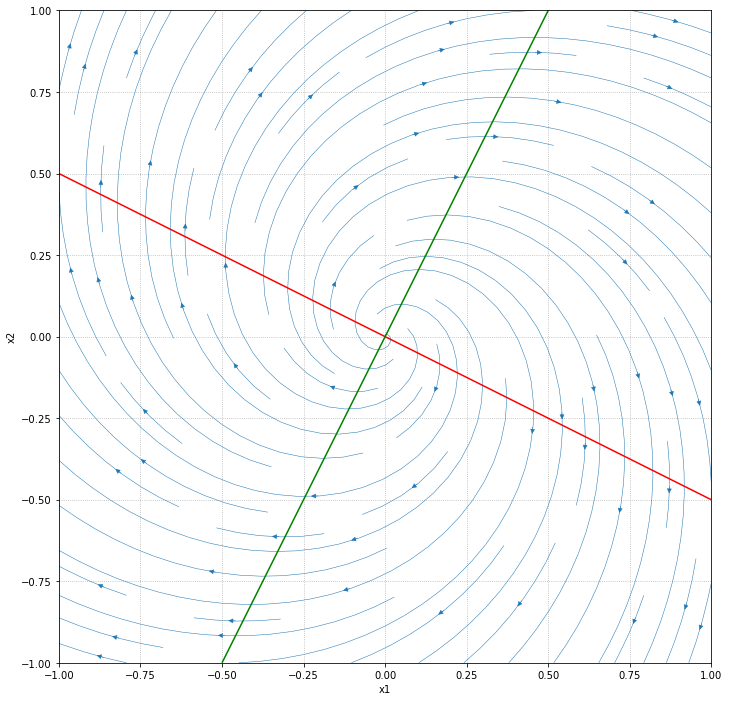

In [7]:
# Unstable spiral / spiral source / centre fixed point (asymptotically unstable)
phase_plane_plot(np.array([[0.5, 1], [-1, 0.5]]))